Stability of accretion tori (Goldreich,Goodman, Narayan 1986)
- vorticity: $\nabla \times v$ describes how things would spin locally 
- uses g around a central point mass

####I have analytically shown that the $\rho$(x,z) and p(x,z) equation satisfies hydrostatic equilibrium equation.
Then all I have to do is do coordinate transformation and convert the (x,z) in pseudoCartesian coordinates into 2D polar equations (note this is height-integrated equations) 

__Later Reading__
- P&P (1985) second paper

#### Running things in spherical polar 

-  Fatal error: par_gets: Par "d" not found in Block "problem"
    - forgot to add --with-coord=spherical in configure 

- ``./configure --with-coord=spherical --with-gas=mhd --with-flux=hlld --with-integrator=vl --with-order=2p --with-problem=sphtorus``


- the reason why I kept seeing 3Dppi when I enter ``athena -h`` is that in my bashrc I defaulted athena to alias on athena4.2 so it keeps pointing to that version 

- So for the transform operation on VisIT, I need to do "Spherical to Cartesian" (I made this mistake of switching it - around in the cylindrical example)

- trouble embedding .mpg movies. But it can not save movie as other file type .mp4 or something else in the save movie option since script not found error. 

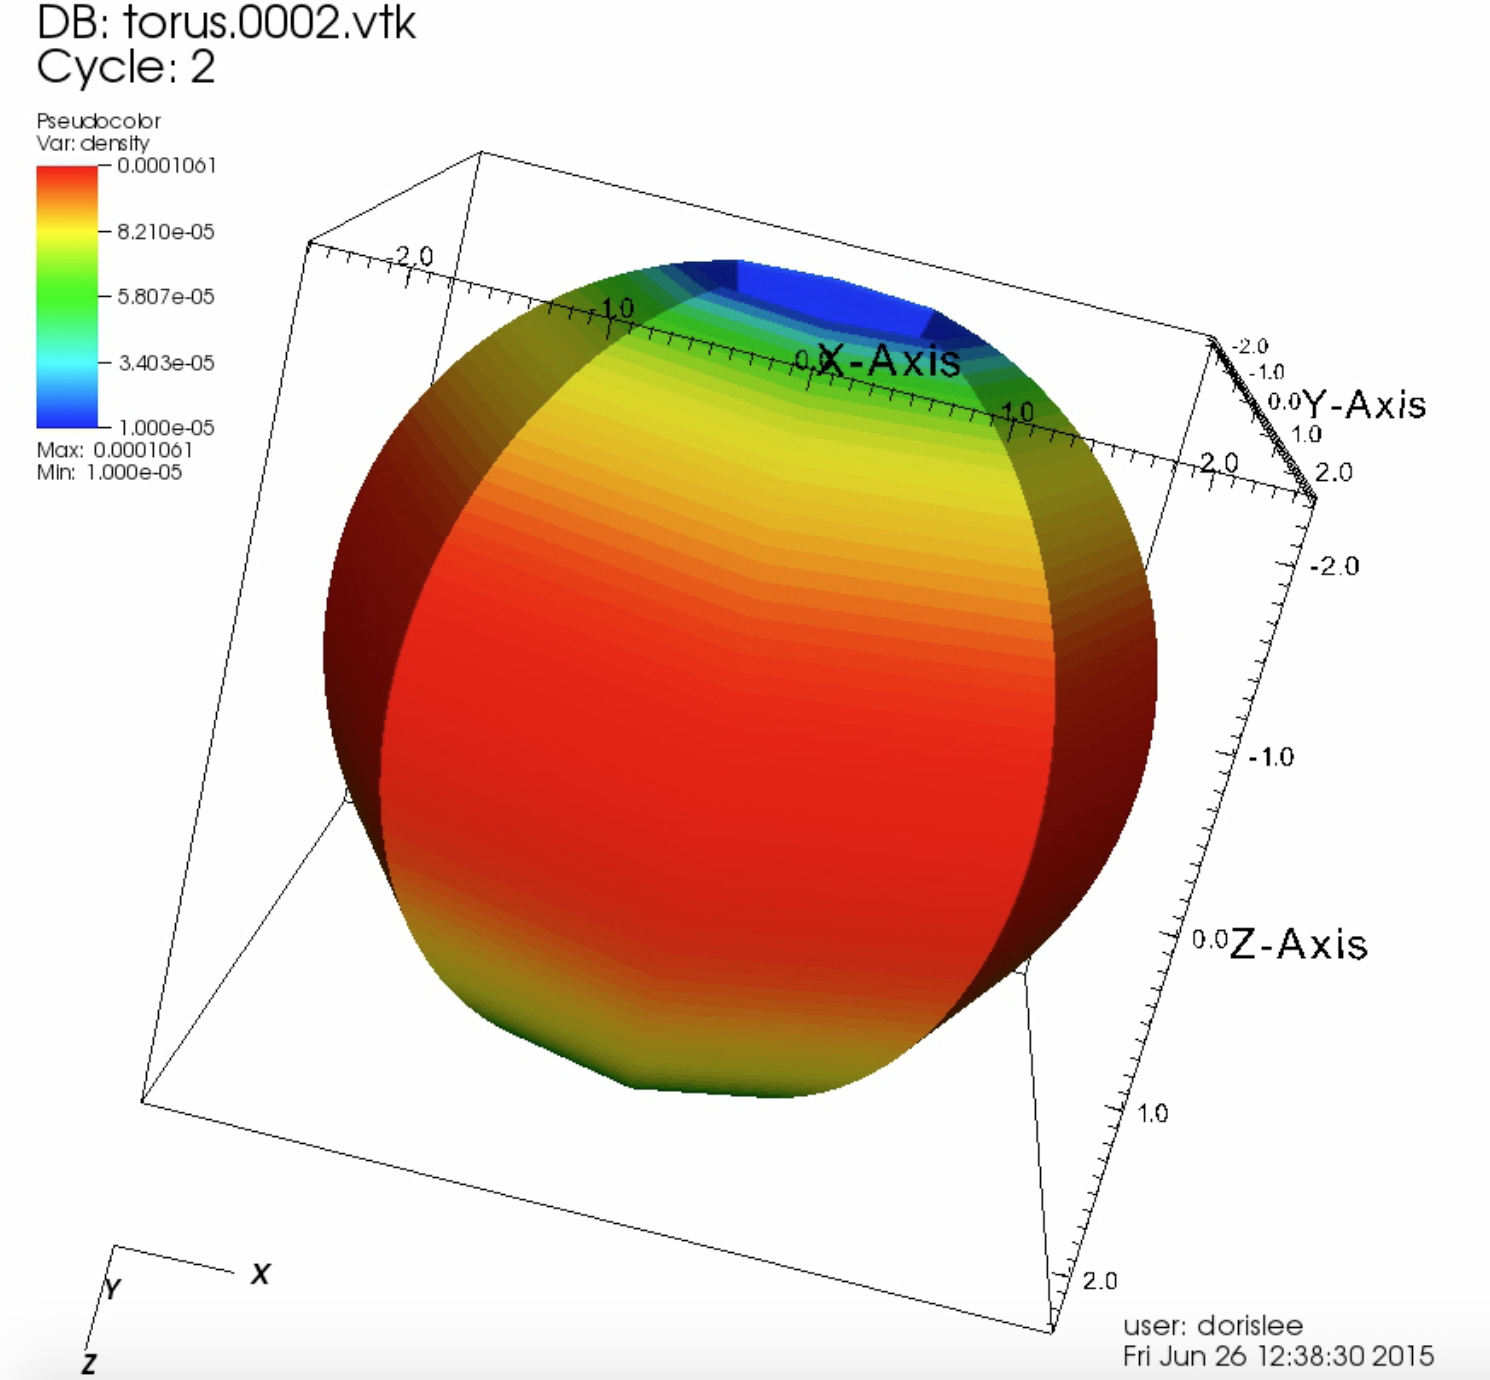

In [16]:
from IPython.display import Image
Image(filename="../data/sphtorus.png",width=500)

Now I want to modify this sphtorus.c file so that I can set up my problem which I already defined analytically this morning.

I wanted to take a look at these profiles in 2D first . The 2D polar and 3D spherical should have the same initial condition since the initial condition is axissymmetric so there is no $\phi$ dependence 

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
n = 1.5
q=2.
a=5.
w0=30.
omega0=10.
r = np.linspace(-w0,w0,100)
omega = omega0*(w0/r)**q#radial velocity

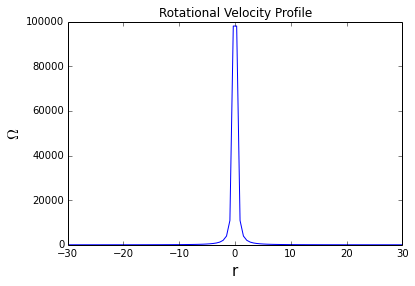

In [3]:
plt.title("Rotational Velocity Profile")
plt.xlabel("r",fontsize=15)
plt.ylabel("$\Omega$",fontsize=15)
plt.plot(r,omega,'-')

In [4]:
from matplotlib.colors import LogNorm
import matplotlib.colors as cmap

In [10]:
grid=np.meshgrid(np.arange(-img.shape[0],img.shape[0]),np.arange(-img.shape[1],img.shape[1]))

NameError: name 'img' is not defined

In [8]:
np.meshgrid?

In [11]:
# for x in grid:
#     for y in grid[::,x]:
#         r = x**2+y**2
#         if (r!=0):
#             wi= omega0*(w0/r)**q #radial velocity
#         else:
#             wi=10.
#             #print r, wi
#         omega_img[x][y]  =wi
# plt.imshow(omega_img,norm=LogNorm(),origin="lower")
# plt.title("q=2",fontsize=14)
# plt.xlabel("x",fontsize=14)
# plt.ylabel("y",fontsize=14)
# plt.colorbar()

In [12]:
-img.shape[0]

NameError: name 'img' is not defined

In [13]:
omega_img.shape

NameError: name 'omega_img' is not defined

<matplotlib.colorbar.Colorbar instance at 0x1129be638>

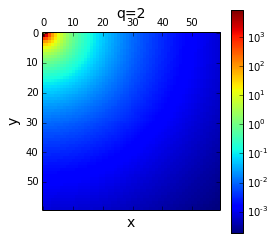

In [17]:
omega_img = np.zeros((61,61))
# plt.imshow(omega_img)
for x in np.arange(-omega_img.shape[0],omega_img.shape[0]):
    for y in np.arange(-omega_img.shape[1],omega_img.shape[1]):
#         print x,y
        r = x**2+y**2
        if (r!=0):
            wi= omega0*(w0/r)**q #radial velocity
        else:
            wi=10.
            #print r, wi
        omega_img[x][y]  =wi
plt.figure()
plt.matshow(omega_img,norm=LogNorm())#,origin="lower")
#plt.pcolor(omega_img,norm=LogNorm())#,origin="lower")
plt.title("q=2",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.colorbar()

/Users/dorislee/.virtualenvs/py27dev/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


<matplotlib.colorbar.Colorbar instance at 0x113542ab8>

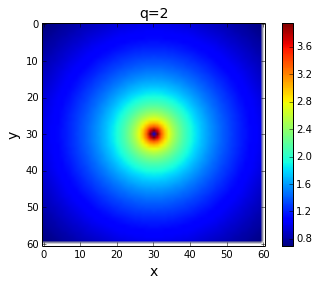

In [42]:
omega_img = np.zeros((61,61))
# plt.imshow(omega_img)
for x in np.arange(-1.0*(omega_img.shape[0]-1)/2.,(omega_img.shape[0]-1)/2.):
    for y in np.arange(-1.0*(omega_img.shape[1]-1)/2.,(omega_img.shape[1]-1)/2.):
        
        r = np.sqrt(x**2+y**2)
        
        if (r!=0.0):
            wi= omega0*(w0/r)**q #radial velocity
        else:
            wi=10.
            #print r, wi
        #print x,y,r,wi
        omega_img[x+30][y+30]  =wi
plt.figure()
plt.imshow(np.log10(omega_img))#,norm=LogNorm())#,origin="lower")
#plt.pcolor(omega_img,norm=LogNorm())#,origin="lower")
plt.title("q=2",fontsize=14)
plt.xlabel("x",fontsize=14)
plt.ylabel("y",fontsize=14)
plt.colorbar()

In [40]:
omega_img[0,0]

10.0

In [27]:
foo=np.arange(-1.0*omega_img.shape[0]/2.,1+(omega_img.shape[0]/2.))

In [28]:
foo

array([-30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20.,
       -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
        -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,
         3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,
        14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
        25.,  26.,  27.,  28.,  29.,  30.])